<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

### 1) 타겟으로 사용할 특성을 선택합니다.
- **(객관식) 다음 중 설명이 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    - 특성 3개를 사용해 가장 성능이 좋은 모델 A를 만들고 또 특성 5개를 사용해 최적의 모델 B를 학습하였습니다. 이때 모델 A에서 선택된 특성은 A1, A2, A3 입니다.
    1. 최적의 모델 B에는 특성 A1, A2, A3가 항상 선택됩니다.
    2. 최적의 모델 B 학습시 특성 A1, A2, A3는 전혀 사용되지 않습니다.
    3. 최적의 모델 B에 특성 A1, A2, A3가 선택될지 알 수 없습니다.

In [243]:
### 이곳에서 과제를 진행해 주세요 ### 

# 객관식 답 == 1

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.read_csv("/content/drive/MyDrive/연체전략관리_연체내역(코드 상세설명).csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,상품코드,상품명
0,D01001,일반상환학자금_등록금
1,D01002,일반상환학자금_생활비
2,D01003,일반상환학자금_등록금생활비
3,D01004,일반상환학자금_WEST연수비
4,D01005,일반상환학자금_나라지킴이
5,D02001,취업후상환학자금_등록금
6,D02002,취업후상환학자금_생활비
7,D05001,은행대출보증_등록금
8,D05002,은행대출보증_생활비
9,D05003,은행대출보증_등록금생활비


In [244]:
df = pd.read_csv("/content/drive/MyDrive/연체전략관리_연체내역.csv",encoding='euc-kr')
df

,기준년월,상품코드,대출년도,대출학기,등록금잔액,생활비용잔액,대출기간월수,대출경과개월수,대출거치기간월수,거치경과개월수,거치잔여개월수,상환경과개월수
0,2020-12,D01001,2009,2,3459550,0,120,135,60,0,0,75
1,2020-12,D01001,2009,2,3339510,2209510,180,135,60,0,0,75
2,2020-12,D01001,2009,2,882739,827587,120,135,60,0,0,75
3,2020-12,D01001,2009,2,4267788,0,144,135,24,0,0,111
4,2020-12,D01001,2009,2,4333710,4116371,240,135,120,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
720535,2020-12,D05003,2009,1,3893080,3882770,216,142,96,0,0,46
720536,2020-12,D05003,2009,1,3741130,3734230,228,142,108,0,0,34
720537,2020-12,D05003,2009,1,2744440,2708810,168,142,48,0,0,94
720538,2020-12,D05003,2009,1,2811680,2795510,168,142,48,0,0,94


In [245]:
# 타겟 생성
df.loc[(df['등록금잔액'] == 0)&(df['생활비용잔액'] == 0),'상환여부'] = 0 
df.loc[((df['등록금잔액'] > 0)|(df['생활비용잔액'] > 0))&(df['상환경과개월수']>0),'상환여부'] = 1 

In [246]:
# 타겟 선택
target = df['상환여부']
target = target.fillna(0)


### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
- **(객관식) 다음 설명 중 가장 틀린 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. 특정한 종목의 다음날 주식 종가를 예측하는 문제는 Supervised Learning 문제이다.
    2. 다음날 KOSPI 지수가 증가할지 감소할지 예측하는 문제는 Classification 문제이다.
    3. 축구 경기 도중에 승패를 예측하는 모델을 만들기 위해서는 실시간 통계 정보와 경기마다 승패 데이터가 필요하다.
    4. 이번 시즌 토트넘 선수들의 개인 통계 데이터(슛, 도움, ...)를 사용해서 다음 토트넘 경기의 승패를 예측할 수 있다.
   

In [247]:
### 이곳에서 과제를 진행해 주세요 ### 

# 객관식 답 ==  2번 

#  df['상환여부'] 으로 타겟 값이 0,1로 나뉘므로 분류 문제라고 볼 수 있다
df['상환여부'].value_counts()

1.0    563868
0.0      3480
Name: 상환여부, dtype: int64

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.
- **(객관식) 같은 데이터로 스팸을 예측하는 모델 A와 B를 만들었습니다. 다음 설명 중 가장 올바른 항목을 선택하고 과제 제출폼에 제출하세요.**
    1. A의 재현율은 80%이고 B의 재현율은 60%일 때 A가 더 좋은 모델이다.
    2. A의 정밀도는 80%이고 B의 정밀도는 60%일 때 A가 더 좋은 모델이다.
    3. A는 B보다 정밀도는 높지만 재현율은 낮다. A가 더 좋은 모델이다.
    4. A는 B보다 재현율은 높지만, 정밀도는 낮다. A가 더 좋은 모델이다.
    5. A는 B보다 정밀도, 재현율 모두 높다. A가 더 좋은 모델이다.

In [248]:
### 이곳에서 과제를 진행해 주세요 ### 
# f1 score 선택
#클래스가 2개이며 비율이 1(연체고객) 쪽으로 쏠려서 클래스 불균형이 일어난다
#클래스 불균형일 경우 정확도와 정밀도는 높고 재현율이 크게 떨어지는 경향이 있다
# 그러므로 f1 score를 평가지표로 정하고 precision과 recall의 조화평균으로 성능을 측정해야한다

#객관식 답 === 4


## 🔥 도전과제

### 4) 데이터를 훈련/검증/테스트 데이터로 나누고 전처리를 수행합니다. 그리고 간단한 모델을 사용해서 학습을 수행합니다.
- 이상치(outliers)가 있다면 어떻게 처리할 것인지 설명합니다.
- 무작위로 or 시간에 따라 데이터를 나눌 것인지 설명합니다.
- 모델 학습 결과를 리포팅 합니다.
- 정보 누수(leakage)가 있는지 확인해 봅니다.

In [249]:
!pip install category_encoders

In [250]:
### 이곳에서 과제를 진행해 주세요 ### 

# 정보 누수 없앰 -- target 변수 생성 시 사용된 데이터 제거
train_X = df[['상품코드', '대출기간월수','대출거치기간월수']]


from category_encoders import OneHotEncoder
onehot = OneHotEncoder(cols='상품코드')
train_X = onehot.fit_transform(train_X)
train_X['대출기간월수']

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0         120
1         180
2         120
3         144
4         240
         ... 
720535    216
720536    228
720537    168
720538    168
720539    168
Name: 대출기간월수, Length: 720540, dtype: int64

In [251]:
data = pd.concat([train_X,target],axis=1)
data

,상품코드_1,상품코드_2,상품코드_3,상품코드_4,상품코드_5,상품코드_6,상품코드_7,상품코드_8,상품코드_9,상품코드_10,상품코드_11,대출기간월수,대출거치기간월수,상환여부
0,1,0,0,0,0,0,0,0,0,0,0,120,60,1.0
1,1,0,0,0,0,0,0,0,0,0,0,180,60,1.0
2,1,0,0,0,0,0,0,0,0,0,0,120,60,1.0
3,1,0,0,0,0,0,0,0,0,0,0,144,24,1.0
4,1,0,0,0,0,0,0,0,0,0,0,240,120,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720535,0,0,0,0,0,0,0,0,0,0,1,216,96,1.0
720536,0,0,0,0,0,0,0,0,0,0,1,228,108,1.0
720537,0,0,0,0,0,0,0,0,0,0,1,168,48,1.0
720538,0,0,0,0,0,0,0,0,0,0,1,168,48,1.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_te

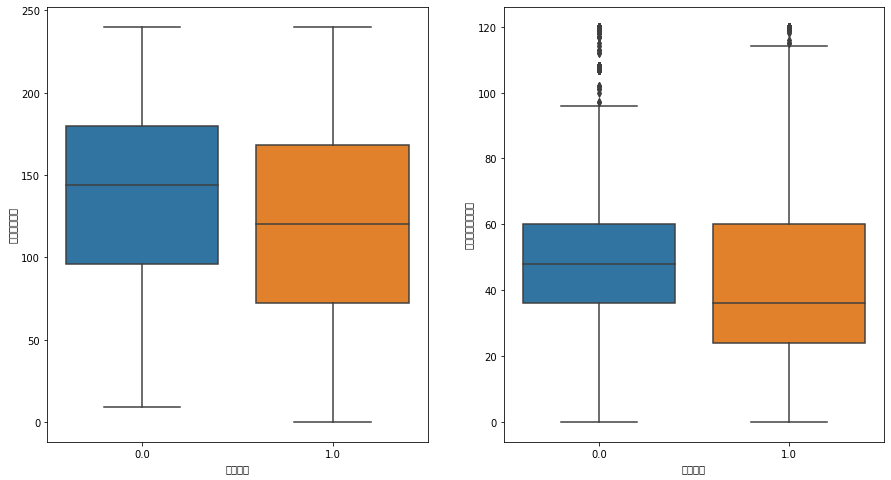

In [252]:
# 이상값 확인 
fig, axes = plt.subplots(ncols=2, figsize=(15,8));

sns.boxplot(x=data['상환여부'], y = data['대출기간월수'], ax=axes[0]);
sns.boxplot(x=data['상환여부'], y = data['대출거치기간월수'], ax=axes[1]);



In [253]:
import numpy as np
def outlier(dt, col):
  new =dt[dt['상환여부'] == 0][col]
  q1,q3 = np.percentile(new.values, [25,75])
  iqr = q3-q1
  lower = q1 - (iqr*1.5)
  upper = q3 + (iqr*1.5)
  return dt[((data[col]<lower)|(data[col]>upper))].index

data = data.drop(outlier(data,'대출거치기간월수'),axis=0)

In [254]:
def outlier(dt, col):
  new =dt[dt['상환여부'] == 1][col]
  q1,q3 = np.percentile(new.values, [25,75])
  iqr = q3-q1
  lower = q1 - (iqr*1.5)
  upper = q3 + (iqr*1.5)
  return dt[((data[col]<lower)|(data[col]>upper))].index

data = data.drop(outlier(data,'대출거치기간월수'),axis=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


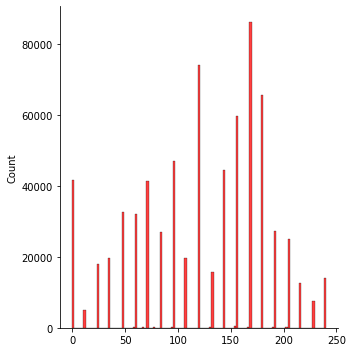

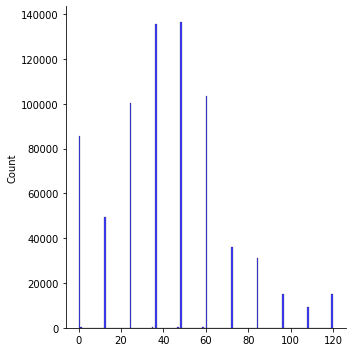

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
mon = train_X['대출기간월수'].values
mon2 = train_X['대출거치기간월수'].values
sns.displot(mon, ax=ax[0], color = 'r')
ax[0].set_xlim(min(mon),max(mon))
sns.displot(mon2, ax=ax[1], color = 'b')
ax[1].set_xlim(min(mon2),max(mon2))

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


(-1.0, 1.3333333333333333)

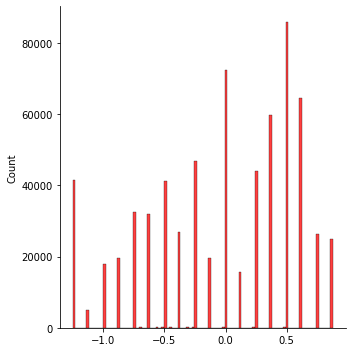

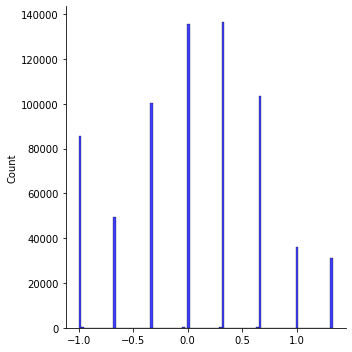

In [256]:
# 스케일러
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()
data['robust'] = rob.fit_transform(data[['대출기간월수']])

sns.displot(data['robust'].values, ax=ax[0], color = 'r')
ax[0].set_xlim(min(data['robust'].values,),max(data['robust'].values,))

rob = RobustScaler()
data['robust2'] = rob.fit_transform(data[['대출거치기간월수']])

sns.displot(data['robust2'].values, ax=ax[0], color = 'b')
ax[0].set_xlim(min(data['robust2'].values,),max(data['robust2'].values,))

In [257]:
data.drop(['대출기간월수','대출거치기간월수'],axis=1,inplace =True)
data

,상품코드_1,상품코드_2,상품코드_3,상품코드_4,상품코드_5,상품코드_6,상품코드_7,상품코드_8,상품코드_9,상품코드_10,상품코드_11,상환여부,robust,robust2
0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.000,0.666667
1,1,0,0,0,0,0,0,0,0,0,0,1.0,0.625,0.666667
2,1,0,0,0,0,0,0,0,0,0,0,1.0,0.000,0.666667
3,1,0,0,0,0,0,0,0,0,0,0,1.0,0.250,-0.333333
5,1,0,0,0,0,0,0,0,0,0,0,1.0,0.000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720533,0,0,0,0,0,0,0,0,0,0,1,1.0,0.250,-0.333333
720534,0,0,0,0,0,0,0,0,0,0,1,1.0,0.625,0.666667
720537,0,0,0,0,0,0,0,0,0,0,1,1.0,0.500,0.333333
720538,0,0,0,0,0,0,0,0,0,0,1,1.0,0.500,0.333333


In [258]:
target = data['상환여부']
data = data.drop(['상환여부'],axis=1)
data

,상품코드_1,상품코드_2,상품코드_3,상품코드_4,상품코드_5,상품코드_6,상품코드_7,상품코드_8,상품코드_9,상품코드_10,상품코드_11,robust,robust2
0,1,0,0,0,0,0,0,0,0,0,0,0.000,0.666667
1,1,0,0,0,0,0,0,0,0,0,0,0.625,0.666667
2,1,0,0,0,0,0,0,0,0,0,0,0.000,0.666667
3,1,0,0,0,0,0,0,0,0,0,0,0.250,-0.333333
5,1,0,0,0,0,0,0,0,0,0,0,0.000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
720533,0,0,0,0,0,0,0,0,0,0,1,0.250,-0.333333
720534,0,0,0,0,0,0,0,0,0,0,1,0.625,0.666667
720537,0,0,0,0,0,0,0,0,0,0,1,0.500,0.333333
720538,0,0,0,0,0,0,0,0,0,0,1,0.500,0.333333


In [259]:
# 무작위 나누기 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, target, train_size=0.8, random_state = 24)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, train_size=0.8, random_state = 24)

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rf = RandomForestClassifier(max_depth= 15,random_state = 24,n_estimators=200)
rf.fit(train_X, train_y)
pred_y = rf.predict(val_X)
f1_score(val_y,pred_y)

0.8854029672587451

In [261]:
pred_y = rf.predict(test_X)
f1_score(test_y,pred_y)

0.8851381047364685

In [262]:

# 랜덤포레스트분류 모델을 만든 결과 f1 score가 검증 데이터 기준 88프로로 나왔습니다.
# 테스트 데이터로 확인해 본 결과 f1 score가 비슷하게 나온 것으로 보아 제데로 모델링이 된 것을 확인 할 수 있습니다. 